In [249]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

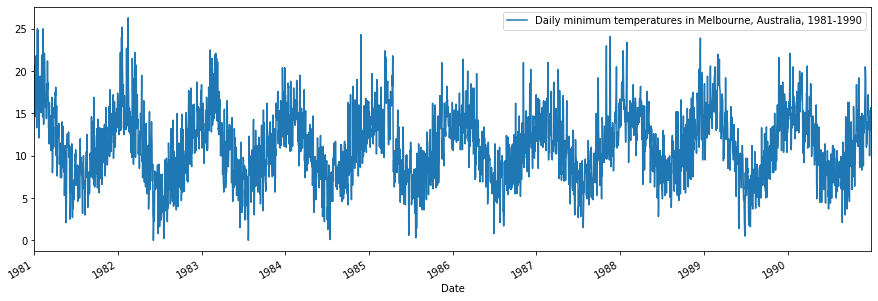

In [250]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df = pd.read_csv(path,parse_dates=['Date'], index_col=['Date'])
df.plot(figsize=(15,5));

In [251]:
path_lynx = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

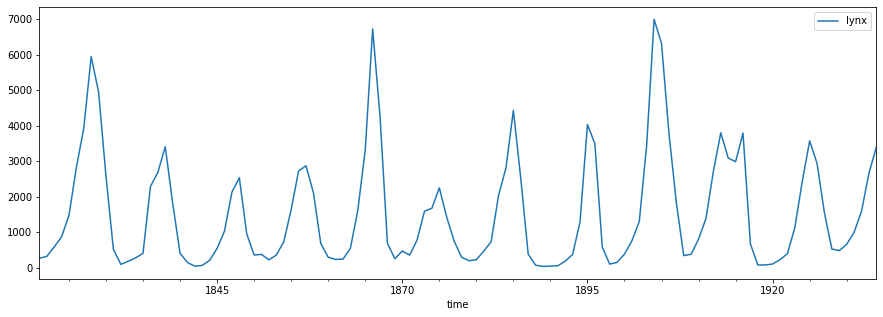

In [252]:
df_path_lynx = pd.read_csv(path_lynx,parse_dates=['time'], index_col=['time'])
df_path_lynx.plot(figsize=(15,5));

In [253]:
path_mauna = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

In [254]:
df_manua = pd.read_csv(path_mauna)
df_manua.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [255]:
df_manua['date'] = df_manua.apply(lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

df_manua[['date']]= pd.to_datetime(df_manua['date'])
df_manua[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.2 KB


In [256]:
df_manua.index = df_manua['date']

In [257]:
df_manua.index

DatetimeIndex(['1974-05-19', '1974-05-26', '1974-06-02', '1974-06-09',
               '1974-06-16', '1974-06-23', '1974-06-30', '1974-07-07',
               '1974-07-14', '1974-07-21',
               ...
               '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23',
               '2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21',
               '2018-10-28', '2018-11-04'],
              dtype='datetime64[ns]', name='date', length=2321, freq=None)

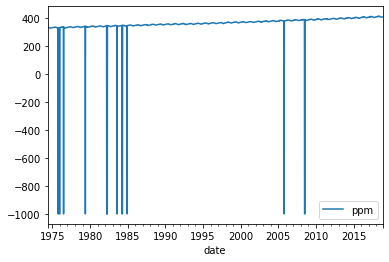

In [258]:
df_manua[['ppm']].plot();

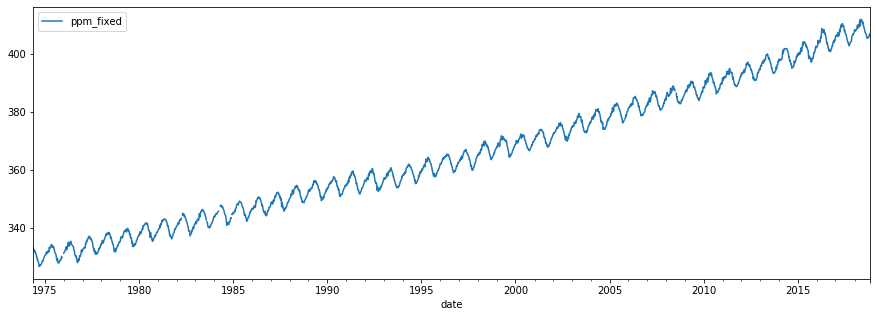

In [259]:
df_manua['ppm_fixed'] = df_manua['ppm'].map(lambda x: np.nan if x <0 else x )
df_manua[['ppm_fixed']].plot(figsize=(15,5))

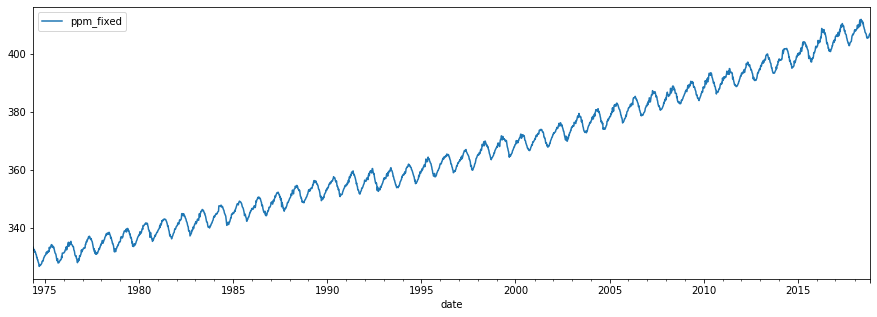

In [260]:
#Wypełnienie brakujących informacji metodą 'backfill'
df_manua['ppm_fixed'] = df_manua['ppm'].map(lambda x: np.nan if x <0 else x ).fillna(method='backfill')
df_manua[['ppm_fixed']].plot(figsize=(15,5));

In [261]:
#Pobranie zbioru dla roku 1974
df1974 = df_manua[df_manua['year'] == 1974]
df1974.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
date,,,,,,,,,,,
1974-05-19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19,333.34
1974-05-26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26,332.95
1974-06-02,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02,332.32
1974-06-09,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09,332.18
1974-06-16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16,332.37


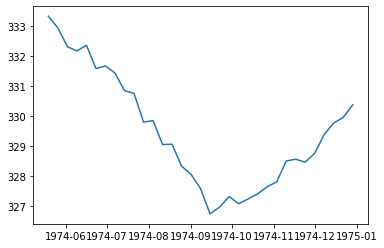

In [262]:
plt.plot(df1974.index, df1974.ppm_fixed);

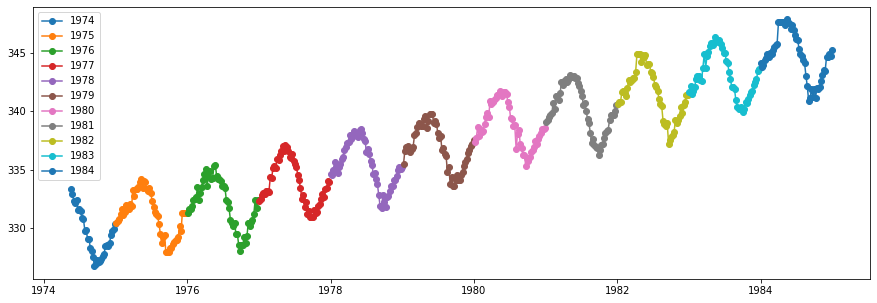

In [263]:
plt.figure(figsize=(15,5));
for year in range(1974,1985):
    df_year = df_manua[df_manua['year'] == year]
    plt.plot(df_year.index, df_year.ppm_fixed, 'o-', label=year)
plt.legend();

In [264]:
def linear_function(manua, k=None, b=0):
    mean_value = np.mean(manua)
    if k is None:
        return [mean_value] * len(manua)
    return [idx*k +b for idx, _ in enumerate(manua)]

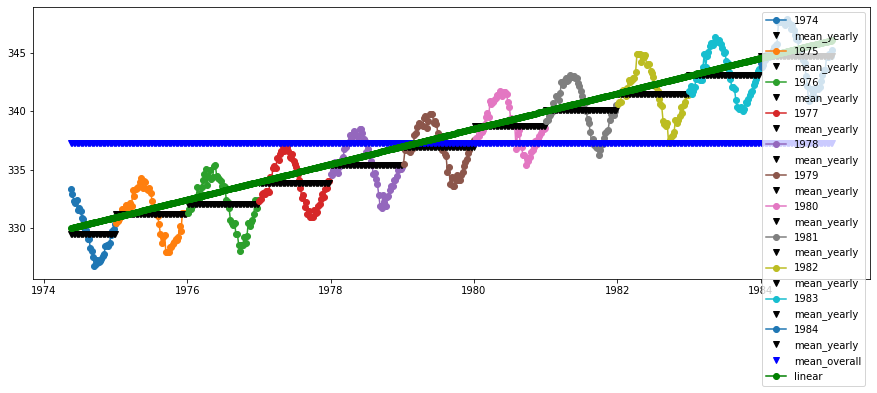

In [307]:
plt.figure(figsize=(15,5));
for year in range(1974,1985):
    df_year = df_manua[df_manua.year == year]
    plt.plot(df_year.index, df_year.ppm_fixed, 'o-', label=year)
    plt.plot(df_year.index, linear_function(df_year.ppm_fixed), 'v', label='mean_yearly', color='black')

df_years = df_manua[(df_manua.year >= 1974) & (df_manua.year<1985)]
plt.plot(df_years.index, linear_function(df_years.ppm_fixed), 'v', label='mean_overall', c='blue')
plt.plot(df_years.index, linear_function(df_years.ppm_fixed, k=0.029, b=330), 'o-', label='linear', c='green')

plt.legend();

In [310]:
for year in range(1974,1985):
    df_year = df_manua[df_manua.year == year]
    print('mae-mean_yearly:', mae(df_year.ppm_fixed, linear_function(df_year.ppm_fixed)))
print('mae-mean_overall:', mae(df_years.ppm_fixed, linear_function(df_years.ppm_fixed)))
print('mae-linear:', mae(df_years.ppm_fixed, linear_function(df_years.ppm_fixed,k=0.02888, b=329)))


mae-mean_yearly: 1.631349862258944
mae-mean_yearly: 1.5137278106508871
mae-mean_yearly: 1.730769230769222
mae-mean_yearly: 1.6517751479290024
mae-mean_yearly: 1.6072766108935552
mae-mean_yearly: 1.5384615384615385
mae-mean_yearly: 1.5453254437869721
mae-mean_yearly: 1.7488609467455551
mae-mean_yearly: 1.797692307692307
mae-mean_yearly: 1.6314201183431907
mae-mean_yearly: 1.6200925596297648
mae-mean_overall: 4.30143371479588
mae-linear: 1.8991827027027022
